# 项目介绍 - 二手车价格预测
二手车价格收到多种因素影响，在现有的数据集下，我们如何通过机器学习的方式去预测它的价格呢？以二手车市场为背景，要求预测二手汽车的交易价格，这是一个典型的回归问题  
内容一：完成数据理解，对原始数据进行数据分析及可视化  
内容二：特征工程，构建样本和特征，利用常规机器学习算法进行价格预测  
内容三：加入神经网络等深度学习框架模型，进行价格预测

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# 1. Read and Check data

In [ ]:
# 数据读取
train_data = pd.read_csv(r'/content/drive/My Drive/推荐系统项目-二手车价格预测/used_car_train_data.csv', sep="\s+")
test_data = pd.read_csv(r'/content/drive/My Drive/推荐系统项目-二手车价格预测/used_car_testA_20200313.csv', sep="\s+")

In [ ]:
print('Train data shape:',train_data.shape)
print('TestA data shape:',test_data.shape)

Train data shape: (150000, 31)
TestA data shape: (50000, 30)


In [ ]:
train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6.0,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1.0,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15.0,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10.0,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5.0,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              150000 non-null  float64
 4   brand              150000 non-null  float64
 5   bodyType           150000 non-null  float64
 6   fuelType           150000 non-null  float64
 7   gearbox            150000 non-null  object 
 8   power              150000 non-null  object 
 9   kilometer          150000 non-null  object 
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  float64
 14  creatDate          150000 non-null  float64
 15  price              150000 non-null  float64
 16  v_

In [ ]:
train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,regionCode,seller,offerType,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,1.500000e+05,1.500000e+05,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,148531.000000,146417.000000,135884.000000
mean,74999.500000,68349.172873,2.003417e+07,47.128953,8.052527,1.870747,1.394827,1.997783e+05,2.841478e+05,1.415701e+06,...,0.246643,0.062381,0.174574,0.296920,0.406928,-0.164371,-0.446352,-0.085471,0.022190,0.008456
std,43301.414527,61103.875095,5.364988e+04,49.535881,7.864603,5.221312,15.676749,1.985073e+06,2.376421e+06,5.151321e+06,...,0.116636,0.133581,0.927042,1.773396,1.962003,3.758661,2.002930,2.257730,1.267140,1.050417
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,-0.273510,-8.206004,-8.399672,-9.168192,-9.404106,-9.639552,-6.113291,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,7.390000e+02,0.000000e+00,0.000000e+00,...,0.241064,0.000161,0.055272,0.036050,0.035225,-3.666042,-2.026105,-1.745234,-0.999703,-0.426907
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,2.010000e+03,0.000000e+00,0.000000e+00,...,0.256928,0.001547,0.090081,0.058523,0.063335,1.240603,-0.457218,-0.160305,0.008602,0.155026
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,3.719000e+03,0.000000e+00,0.000000e+00,...,0.265170,0.104255,0.120590,0.081996,0.094738,2.691063,1.115744,1.572130,0.929041,0.700543
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,999.000000,3500.000000,2.016041e+07,2.016041e+07,2.016041e+07,...,1.401999,1.387847,12.357011,18.819042,18.801218,18.802072,13.562011,11.147669,8.658418,2.743993


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           50000 non-null  float64
 6   fuelType           50000 non-null  float64
 7   gearbox            50000 non-null  object 
 8   power              50000 non-null  object 
 9   kilometer          50000 non-null  object 
 10  notRepairedDamage  50000 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  float64
 13  offerType          50000 non-null  float64
 14  creatDate          50000 non-null  float64
 15  v_0                50000 non-null  float64
 16  v_1                500

In [ ]:
test_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,regionCode,seller,offerType,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.00000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,49548.000000,48880.000000,45356.000000
mean,174999.500000,68542.223280,2.003393e+07,46.844520,8.056240,1.82978,1.310420,1.846027e+05,2.693423e+05,1.420901e+06,...,0.245942,0.062157,0.167631,0.278298,0.394680,-0.180498,-0.441886,-0.093695,0.018620,0.010720
std,14433.901067,61052.808133,5.368870e+04,49.469548,7.819477,4.38703,11.319999,1.907934e+06,2.314646e+06,5.160173e+06,...,0.113548,0.132116,0.889236,1.705061,1.904670,3.749435,2.011260,2.264558,1.262383,1.039922
min,150000.000000,0.000000,1.991000e+07,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,-4.137733e+00,...,0.000000,0.000000,0.000000,-7.481381,-8.088973,-9.160049,-8.916949,-8.249206,-5.881834,-6.112667
25%,162499.750000,11203.500000,1.999091e+07,10.000000,1.000000,0.00000,0.000000,7.500000e+02,0.000000e+00,0.000000e+00,...,0.241186,0.000157,0.055647,0.035926,0.034963,-3.656769,-2.033607,-1.744112,-0.999841,-0.428772
50%,174999.500000,52248.500000,2.003091e+07,29.000000,6.000000,1.00000,0.000000,2.025000e+03,0.000000e+00,0.000000e+00,...,0.257005,0.005279,0.090068,0.058519,0.063502,1.208642,-0.447549,-0.165747,0.009142,0.152347
75%,187499.250000,118856.500000,2.007110e+07,65.000000,13.000000,3.00000,1.000000,3.739000e+03,0.000000e+00,0.000000e+00,...,0.265163,0.104231,0.120749,0.081606,0.094614,2.675705,1.136973,1.567727,0.924715,0.702953
max,199999.000000,196805.000000,2.015121e+07,246.000000,39.000000,500.00000,610.000000,2.016041e+07,2.016041e+07,2.016041e+07,...,1.339804,1.332522,12.338872,18.761276,18.811053,18.856218,12.950498,7.430223,5.228962,2.624622


## 1.1查看数据缺失

### 1.1.1 train_data

In [ ]:
train_data.isnull().sum()

,0
SaleID,0
name,0
regDate,0
model,0
brand,0
bodyType,0
fuelType,0
gearbox,0
power,0
kilometer,0


<Axes: >

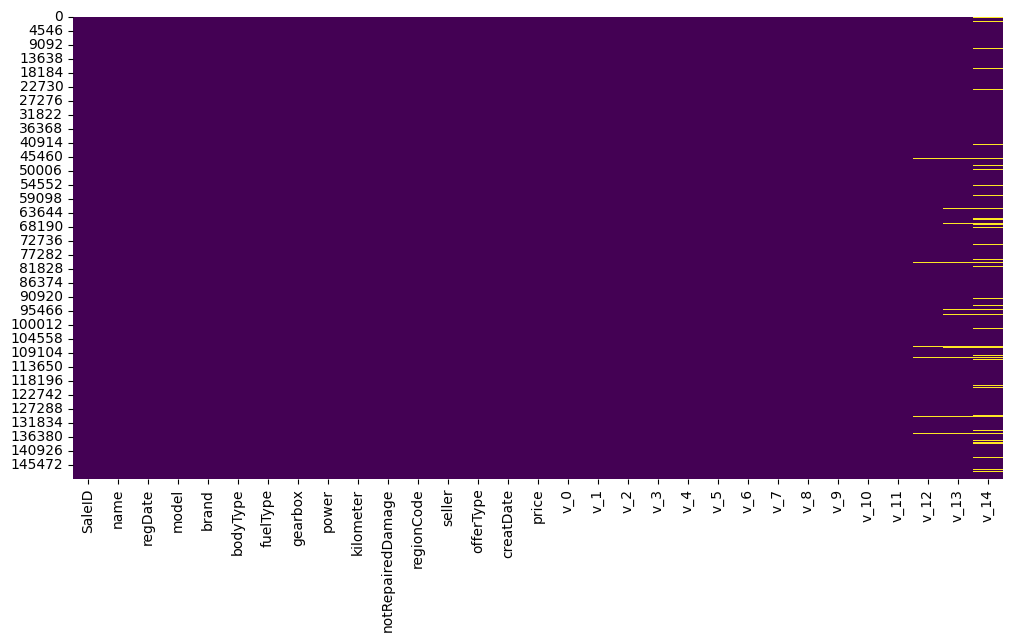

In [ ]:
# 可视化缺失分布
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap="viridis")

### 1.1.2 test_data

In [ ]:
test_data.isnull().sum()

,0
SaleID,0
name,0
regDate,0
model,0
brand,0
bodyType,0
fuelType,0
gearbox,0
power,0
kilometer,0


<Axes: >

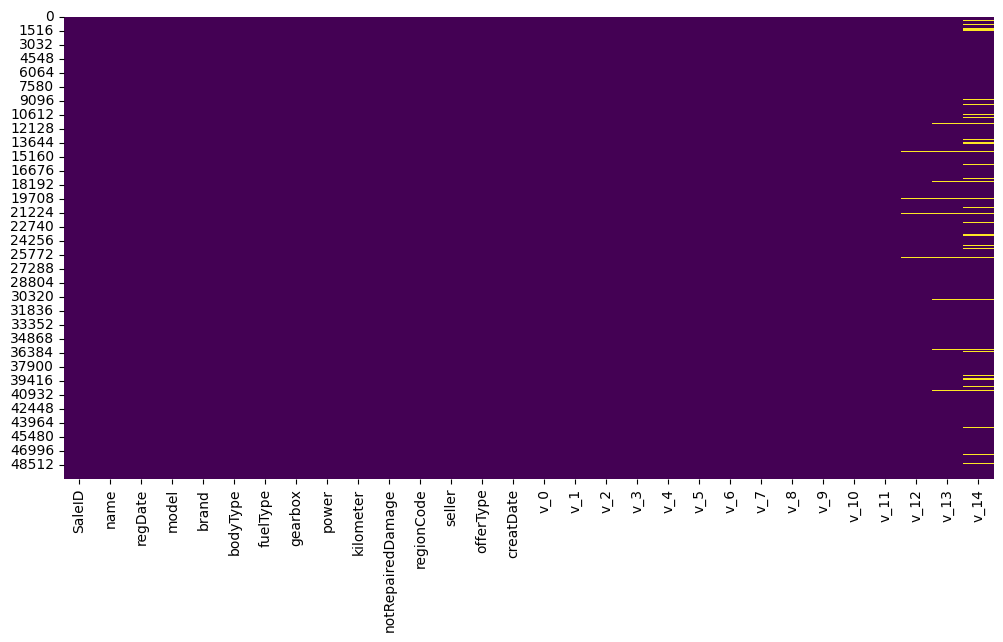

In [ ]:
# 可视化缺失分布
plt.figure(figsize=(12, 6))
sns.heatmap(test_data.isnull(), cbar=False, cmap="viridis")

## 1.2 数据类别和异常值检查
+ 除gearbox, power, kilometer和notRepairedDamage为object外, 其他都为数值类型

### 1.2.1 train dataset - 数据类别检查

In [ ]:
train_data['notRepairedDamage'].value_counts()

,count
notRepairedDamage,
0.0,105715
-,17558
1.0,12611
0,3586
70,56
...,...
1283,1
4490,1
4300,1


In [ ]:
mask = ~train_data['notRepairedDamage'].isin(["0.0", "1.0", '-'])
abnormal_count = mask.sum()
print(f"异常值数量: {abnormal_count}")

异常值数量: 14116


In [ ]:
for val in train_data['notRepairedDamage'].unique():
    print(val, type(val))

0.0 <class 'str'>
- <class 'str'>
1.0 <class 'str'>
0 <class 'str'>
4825 <class 'str'>
1326 <class 'str'>
6792 <class 'str'>
5765 <class 'str'>
1141 <class 'str'>
5084 <class 'str'>
1465 <class 'str'>
5313 <class 'str'>
665 <class 'str'>
1225 <class 'str'>
560 <class 'str'>
4293 <class 'str'>
556 <class 'str'>
6409 <class 'str'>
2578 <class 'str'>
2679 <class 'str'>
2754 <class 'str'>
6244 <class 'str'>
1543 <class 'str'>
2049 <class 'str'>
5997 <class 'str'>
78 <class 'str'>
125 <class 'str'>
1496 <class 'str'>
1411 <class 'str'>
200 <class 'str'>
874 <class 'str'>
2062 <class 'str'>
336 <class 'str'>
754 <class 'str'>
3103 <class 'str'>
3815 <class 'str'>
446 <class 'str'>
762 <class 'str'>
3124 <class 'str'>
4987 <class 'str'>
2468 <class 'str'>
1319 <class 'str'>
2007 <class 'str'>
3972 <class 'str'>
486 <class 'str'>
5435 <class 'str'>
3235 <class 'str'>
4975 <class 'str'>
5806 <class 'str'>
398 <class 'str'>
6111 <class 'str'>
2870 <class 'str'>
2557 <class 'str'>
107 <class 'str

In [ ]:
train_data['gearbox'].value_counts()

,count
gearbox,
0.0,104864
1.0,31105
0,3373
15.0,1517
-,1387
...,...
1988,1
2598,1
436,1


In [ ]:
for val in train_data['gearbox'].unique():
    print(val, type(val))

0.0 <class 'str'>
1.0 <class 'str'>
15.0 <class 'str'>
90 <class 'str'>
60 <class 'str'>
0 <class 'str'>
115 <class 'str'>
50 <class 'str'>
- <class 'str'>
142 <class 'str'>
8.0 <class 'str'>
265 <class 'str'>
101 <class 'str'>
170 <class 'str'>
190 <class 'str'>
349 <class 'str'>
61 <class 'str'>
12.5 <class 'str'>
150 <class 'str'>
45 <class 'str'>
65 <class 'str'>
75 <class 'str'>
54 <class 'str'>
187 <class 'str'>
136 <class 'str'>
125 <class 'str'>
143 <class 'str'>
58 <class 'str'>
70 <class 'str'>
29 <class 'str'>
74 <class 'str'>
95 <class 'str'>
55 <class 'str'>
167 <class 'str'>
116 <class 'str'>
120 <class 'str'>
140 <class 'str'>
163 <class 'str'>
33 <class 'str'>
2.0 <class 'str'>
56 <class 'str'>
110 <class 'str'>
131 <class 'str'>
250 <class 'str'>
100 <class 'str'>
211 <class 'str'>
71 <class 'str'>
10.0 <class 'str'>
102 <class 'str'>
88 <class 'str'>
5.0 <class 'str'>
165 <class 'str'>
64 <class 'str'>
179 <class 'str'>
73 <class 'str'>
400 <class 'str'>
87 <class 'st

In [ ]:
train_data['power'].value_counts()

,count
power,
75,8798
15.0,7793
0,7186
150,6091
60,5781
...,...
6677,1
5886,1
5240,1


In [ ]:
for val in train_data['power'].unique():
    print(val, type(val))
    # 数据类型不对且有异常值, [0,600]

60 <class 'str'>
0 <class 'str'>
163 <class 'str'>
193 <class 'str'>
68 <class 'str'>
109 <class 'str'>
150 <class 'str'>
101 <class 'str'>
179 <class 'str'>
88 <class 'str'>
75 <class 'str'>
58 <class 'str'>
- <class 'str'>
128 <class 'str'>
239 <class 'str'>
145 <class 'str'>
45 <class 'str'>
105 <class 'str'>
54 <class 'str'>
143 <class 'str'>
218 <class 'str'>
170 <class 'str'>
90 <class 'str'>
306 <class 'str'>
133 <class 'str'>
116 <class 'str'>
15.0 <class 'str'>
102 <class 'str'>
177 <class 'str'>
140 <class 'str'>
115 <class 'str'>
180 <class 'str'>
131 <class 'str'>
110 <class 'str'>
160 <class 'str'>
65 <class 'str'>
120 <class 'str'>
73 <class 'str'>
77 <class 'str'>
500 <class 'str'>
136 <class 'str'>
233 <class 'str'>
125 <class 'str'>
300 <class 'str'>
190 <class 'str'>
192 <class 'str'>
126 <class 'str'>
203 <class 'str'>
55 <class 'str'>
100 <class 'str'>
122 <class 'str'>
174 <class 'str'>
69 <class 'str'>
165 <class 'str'>
320 <class 'str'>
64 <class 'str'>
78 <class

In [ ]:
train_data['kilometer'].value_counts()

,count
kilometer,
15.0,86699
12.5,14534
10.0,5975
0.0,4980
9.0,4927
...,...
5809,1
6486,1
344,1


In [ ]:
for val in train_data['kilometer'].unique():
    print(val, type(val))
    # 数据类型不对且有异常值, [0,20]

12.5 <class 'str'>
15.0 <class 'str'>
5.0 <class 'str'>
10.0 <class 'str'>
2.0 <class 'str'>
6.0 <class 'str'>
3972 <class 'str'>
1278 <class 'str'>
3.0 <class 'str'>
0.0 <class 'str'>
7.0 <class 'str'>
8.0 <class 'str'>
9.0 <class 'str'>
26 <class 'str'>
4.0 <class 'str'>
2976 <class 'str'>
1.0 <class 'str'>
- <class 'str'>
0 <class 'str'>
0.5 <class 'str'>
2615 <class 'str'>
896 <class 'str'>
6597 <class 'str'>
3741 <class 'str'>
4566 <class 'str'>
6696 <class 'str'>
179 <class 'str'>
944 <class 'str'>
5649 <class 'str'>
368 <class 'str'>
5963 <class 'str'>
2294 <class 'str'>
1294 <class 'str'>
3519 <class 'str'>
491 <class 'str'>
2482 <class 'str'>
1123 <class 'str'>
2247 <class 'str'>
208 <class 'str'>
2607 <class 'str'>
4062 <class 'str'>
2593 <class 'str'>
1168 <class 'str'>
2705 <class 'str'>
290 <class 'str'>
3216 <class 'str'>
4494 <class 'str'>
4682 <class 'str'>
2603 <class 'str'>
6839 <class 'str'>
3780 <class 'str'>
2472 <class 'str'>
213 <class 'str'>
78 <class 'str'>
449

### 1.2.2 test data - 数据类别检查

In [ ]:
test_data['notRepairedDamage'].value_counts()

,count
notRepairedDamage,
0.0,35382
-,5847
1.0,4127
0,1120
1530,19
...,...
1241,1
1525,1
2619,1


In [ ]:
for val in test_data['notRepairedDamage'].unique():
    print(val, type(val))

0.0 <class 'str'>
1.0 <class 'str'>
- <class 'str'>
2085 <class 'str'>
0 <class 'str'>
5953 <class 'str'>
3169 <class 'str'>
964 <class 'str'>
2025 <class 'str'>
5623 <class 'str'>
3351 <class 'str'>
1233 <class 'str'>
4007 <class 'str'>
1552 <class 'str'>
2962 <class 'str'>
3517 <class 'str'>
309 <class 'str'>
4454 <class 'str'>
803 <class 'str'>
2859 <class 'str'>
4175 <class 'str'>
831 <class 'str'>
1222 <class 'str'>
4107 <class 'str'>
2251 <class 'str'>
4652 <class 'str'>
4573 <class 'str'>
718 <class 'str'>
238 <class 'str'>
2718 <class 'str'>
1535 <class 'str'>
5191 <class 'str'>
2957 <class 'str'>
3677 <class 'str'>
3047 <class 'str'>
1597 <class 'str'>
84 <class 'str'>
2986 <class 'str'>
1973 <class 'str'>
3953 <class 'str'>
725 <class 'str'>
2219 <class 'str'>
2396 <class 'str'>
2829 <class 'str'>
502 <class 'str'>
1185 <class 'str'>
167 <class 'str'>
5748 <class 'str'>
3428 <class 'str'>
874 <class 'str'>
99 <class 'str'>
3143 <class 'str'>
998 <class 'str'>
5548 <class 'str

In [ ]:
test_data['gearbox'].value_counts()

,count
gearbox,
0.0,35033
1.0,10345
0,1108
15.0,485
-,434
...,...
521,1
280,1
480,1


In [ ]:
test_data['kilometer'].value_counts()

,count
kilometer,
15.0,28869
12.5,4935
10.0,1944
9.0,1689
0.0,1641
...,...
2293,1
3210,1
2991,1


In [ ]:
test_data['power'].value_counts()

,count
power,
75,2955
15.0,2549
0,2382
150,2053
60,1967
...,...
6600,1
5396,1
10522,1


## 1.3 数据类别和异常值处理

### 1.3.1 处理notRepairedDamage和gearbox字段

In [ ]:
def clean_categories(col):
    col = col.astype(str)
    col = col.apply(lambda x: x if x in ['0.0', '1.0'] else np.nan)
    return pd.to_numeric(col, errors='coerce').fillna(-1).astype(int)

In [ ]:
# 应用于训练集和测试集
train_data['notRepairedDamage'] = clean_categories(train_data['notRepairedDamage'])
train_data['gearbox'] = clean_categories(train_data['gearbox'])
test_data['notRepairedDamage'] = clean_categories(test_data['notRepairedDamage'])
test_data['gearbox'] = clean_categories(test_data['gearbox'])

In [ ]:
train_data['gearbox'].value_counts()

,count
gearbox,
0,104864
1,31105
-1,14031


### 1.3.2 处理power字段

In [ ]:
def clean_power(col, max_valid=600):
    col = pd.to_numeric(col, errors='coerce')
    col = col.apply(lambda x: x if 0 <= x <= max_valid else np.nan)
    return col.fillna(-1).astype(int)

In [ ]:
train_data['power'] = clean_power(train_data['power'])
test_data['power'] = clean_power(test_data['power'])

In [ ]:
for val in train_data['power'].unique():
    print(val, type(val))

60 <class 'numpy.int64'>
0 <class 'numpy.int64'>
163 <class 'numpy.int64'>
193 <class 'numpy.int64'>
68 <class 'numpy.int64'>
109 <class 'numpy.int64'>
150 <class 'numpy.int64'>
101 <class 'numpy.int64'>
179 <class 'numpy.int64'>
88 <class 'numpy.int64'>
75 <class 'numpy.int64'>
58 <class 'numpy.int64'>
-1 <class 'numpy.int64'>
128 <class 'numpy.int64'>
239 <class 'numpy.int64'>
145 <class 'numpy.int64'>
45 <class 'numpy.int64'>
105 <class 'numpy.int64'>
54 <class 'numpy.int64'>
143 <class 'numpy.int64'>
218 <class 'numpy.int64'>
170 <class 'numpy.int64'>
90 <class 'numpy.int64'>
306 <class 'numpy.int64'>
133 <class 'numpy.int64'>
116 <class 'numpy.int64'>
15 <class 'numpy.int64'>
102 <class 'numpy.int64'>
177 <class 'numpy.int64'>
140 <class 'numpy.int64'>
115 <class 'numpy.int64'>
180 <class 'numpy.int64'>
131 <class 'numpy.int64'>
110 <class 'numpy.int64'>
160 <class 'numpy.int64'>
65 <class 'numpy.int64'>
120 <class 'numpy.int64'>
73 <class 'numpy.int64'>
77 <class 'numpy.int64'>
5

### 1.3.3 处理kilometer字段

In [ ]:
def clean_kilometer(col, max_valid=20):
    col = pd.to_numeric(col, errors='coerce')
    col = col.apply(lambda x: x if 0 <= x <= max_valid else np.nan)
    return col.fillna(-1).astype(int)

In [ ]:
train_data['kilometer'] = clean_kilometer(train_data['kilometer'])
test_data['kilometer'] = clean_kilometer(test_data['kilometer'])

In [ ]:
for val in train_data['kilometer'].unique():
    print(val, type(val))

12 <class 'numpy.int64'>
15 <class 'numpy.int64'>
5 <class 'numpy.int64'>
10 <class 'numpy.int64'>
2 <class 'numpy.int64'>
6 <class 'numpy.int64'>
-1 <class 'numpy.int64'>
3 <class 'numpy.int64'>
0 <class 'numpy.int64'>
7 <class 'numpy.int64'>
8 <class 'numpy.int64'>
9 <class 'numpy.int64'>
4 <class 'numpy.int64'>
1 <class 'numpy.int64'>
18 <class 'numpy.int64'>
17 <class 'numpy.int64'>


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              150000 non-null  float64
 4   brand              150000 non-null  float64
 5   bodyType           150000 non-null  float64
 6   fuelType           150000 non-null  float64
 7   gearbox            150000 non-null  int64  
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  int64  
 10  notRepairedDamage  150000 non-null  int64  
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  float64
 14  creatDate          150000 non-null  float64
 15  price              150000 non-null  float64
 16  v_

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           50000 non-null  float64
 6   fuelType           50000 non-null  float64
 7   gearbox            50000 non-null  int64  
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  int64  
 10  notRepairedDamage  50000 non-null  int64  
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  float64
 13  offerType          50000 non-null  float64
 14  creatDate          50000 non-null  float64
 15  v_0                50000 non-null  float64
 16  v_1                500

### 1.3.4 处理bodyType字段

In [ ]:
def clean_bodyType(col, max_valid=7):
    col = pd.to_numeric(col, errors='coerce')
    col = col.apply(lambda x: x if 0 <= x <= max_valid else np.nan)
    return col.fillna(-1).astype(int)

In [ ]:
train_data['bodyType'] = clean_bodyType(train_data['bodyType'])
test_data['bodyType'] = clean_bodyType(test_data['bodyType'])

In [ ]:
for val in train_data['bodyType'].unique():
    print(val, type(val))

1 <class 'numpy.int64'>
2 <class 'numpy.int64'>
0 <class 'numpy.int64'>
5 <class 'numpy.int64'>
3 <class 'numpy.int64'>
6 <class 'numpy.int64'>
7 <class 'numpy.int64'>
4 <class 'numpy.int64'>
-1 <class 'numpy.int64'>


### 1.3.5 处理fuelType字段

In [ ]:
def clean_fuelType(col, max_valid=6):
    col = pd.to_numeric(col, errors='coerce')
    col = col.apply(lambda x: x if 0 <= x <= max_valid else np.nan)
    return col.fillna(-1).astype(int)

In [ ]:
train_data['fuelType'] = clean_fuelType(train_data['fuelType'])
test_data['fuelType'] = clean_fuelType(test_data['fuelType'])

In [ ]:
for val in train_data['fuelType'].unique():
    print(val, type(val))

0 <class 'numpy.int64'>
1 <class 'numpy.int64'>
-1 <class 'numpy.int64'>
2 <class 'numpy.int64'>
3 <class 'numpy.int64'>
4 <class 'numpy.int64'>
5 <class 'numpy.int64'>
6 <class 'numpy.int64'>


### 1.3.6 处理seller字段

In [ ]:
def clean_seller(col, max_valid=1):
    col = pd.to_numeric(col, errors='coerce')
    col = col.apply(lambda x: x if 0 <= x <= max_valid else np.nan)
    return col.fillna(-1).astype(int)

In [ ]:
train_data['seller'] = clean_seller(train_data['seller'])
test_data['seller'] = clean_seller(test_data['seller'])

In [ ]:
for val in train_data['seller'].unique():
    print(val, type(val))

0 <class 'numpy.int64'>
-1 <class 'numpy.int64'>
1 <class 'numpy.int64'>


### 1.3.7 处理offerType字段

In [ ]:
def clean_offerType(col, max_valid=1):
    col = pd.to_numeric(col, errors='coerce')
    col = col.apply(lambda x: x if 0 <= x <= max_valid else np.nan)
    return col.fillna(-1).astype(int)

In [ ]:
train_data['offerType'] = clean_offerType(train_data['offerType'])
test_data['offerType'] = clean_offerType(test_data['offerType'])

In [ ]:
for val in train_data['offerType'].unique():
    print(val, type(val))

0 <class 'numpy.int64'>
-1 <class 'numpy.int64'>


## 1.4 类别变量分布检查

In [ ]:
train_data['notRepairedDamage'].value_counts()

,count
notRepairedDamage,
0,105715
-1,31674
1,12611


In [ ]:
train_data['bodyType'].value_counts()

,count
bodyType,
0,45004
1,35996
2,30348
3,13498
4,9609
5,7612
6,6481
7,1289
-1,163


In [ ]:
train_data['fuelType'].value_counts()

,count
fuelType,
0,97414
1,47622
-1,2238
2,2217
3,270
4,129
5,57
6,53


In [ ]:
train_data['gearbox'].value_counts()

,count
gearbox,
0,104864
1,31105
-1,14031


In [ ]:
train_data['seller'].value_counts()

,count
seller,
0,146416
-1,3583
1,1


In [ ]:
train_data['offerType'].value_counts()

,count
offerType,
0,135884
-1,14116


In [ ]:
# seller和offerType的类别倾斜严重, 数据几乎全为个体销售，以及主动提供报价类型, 全部删除
del train_data['seller']
del train_data['offerType']
del test_data['seller']
del test_data['offerType']

In [ ]:
train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6.0,1,0,0,60,12,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1.0,2,0,0,0,15,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15.0,1,0,0,163,12,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10.0,0,0,1,193,15,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5.0,1,0,0,68,5,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


# 2. EDA

## 2.1 预测值的分布

### 2.1.1 查看预测值的skewness(偏度) and kurtosis(峰度)

/tmp/ipython-input-84-3538112527.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['price']);


Skewness: 3.259240
Kurtosis: 17.966895


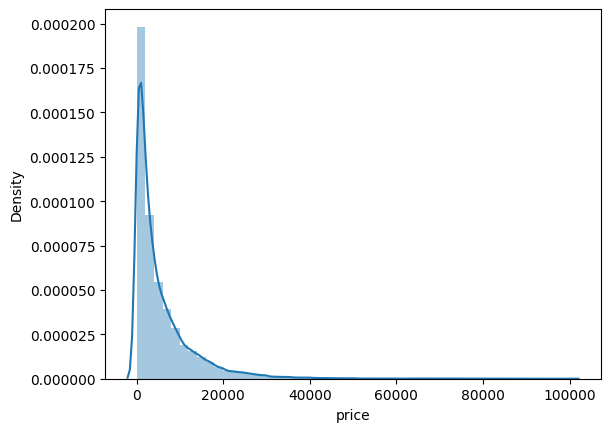

In [ ]:
sns.distplot(train_data['price']);
print("Skewness: %f" % train_data['price'].skew())
print("Kurtosis: %f" % train_data['price'].kurt())

Conlusion:   
+ 偏度>3,说明数据大部分集中在左侧（即价格偏低）;  
+ 峰度高说明数据集中性强（大多数车价集中在低价区）

### 2.1.2 查看price的直方图分布

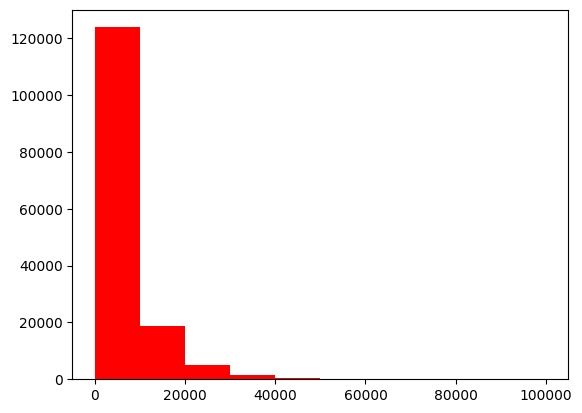

In [ ]:
plt.hist(train_data['price'],histtype = 'bar', color ='red')
plt.show()

### 2.1.3 对price进行log变换

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


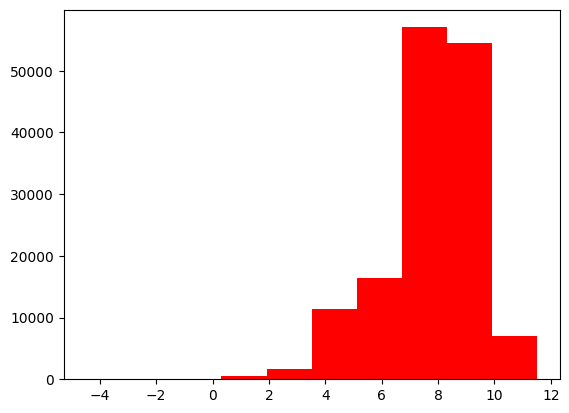

In [ ]:
plt.hist(np.log(train_data['price']), orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

+ 可以看到log变换之后的分布更均匀

In [ ]:
# 对price做log变换
train_data['log_price'] = np.log1p(train_data['price'])  # 避免 log(0) 报错

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


+ 将log_price作为回归目标预测, 需要再使用np.expm1(y_pred)还原预测值为原始价格。

In [ ]:
# 保存训练集
train_data.to_csv(r'/content/drive/My Drive/推荐系统项目-二手车价格预测/cleaned_train_data.csv', index=False, encoding='utf-8')

# 保存测试集
test_data.to_csv(r'/content/drive/My Drive/推荐系统项目-二手车价格预测/cleaned_test_data.csv', index=False, encoding='utf-8')

## 2.2 数值特征的相关性分析

In [ ]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14', "price", "log_price"]

In [ ]:
price_numeric = train_data[numeric_features]
correlation = price_numeric.corr()
print(correlation['log_price'].sort_values(ascending = False),'\n')

log_price    1.000000
v_0          0.811132
price        0.682859
v_12         0.651727
power        0.638410
v_5          0.491399
kilometer    0.310073
v_2          0.089060
v_14         0.056244
v_13         0.024355
v_1         -0.019695
v_4         -0.161670
v_6         -0.247532
v_7         -0.265672
v_11        -0.270104
v_8         -0.283529
v_10        -0.305617
v_9         -0.433657
v_3         -0.612190
Name: log_price, dtype: float64 



<Axes: title={'center': 'Correlation of Numeric Features with log_Price'}>

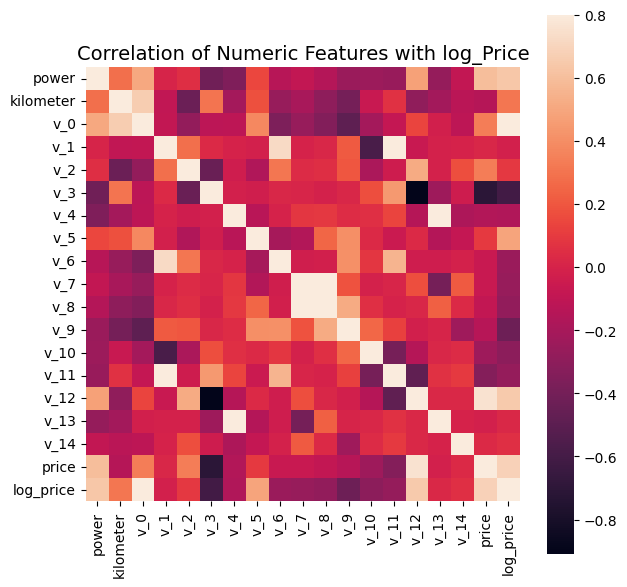

In [ ]:
# 热力图可视化相关性
f , ax = plt.subplots(figsize = (7, 7))

plt.title('Correlation of Numeric Features with log_Price',y=1,size=14)

sns.heatmap(correlation,square = True,  vmax=0.8)

+ 可以用与log_price的|相关性|作为筛选

# 3. 特征工程

In [ ]:
# 数据读取
train_data = pd.read_csv(r'/content/drive/My Drive/推荐系统项目-二手车价格预测/cleaned_train_data.csv')
test_data = pd.read_csv(r'/content/drive/My Drive/推荐系统项目-二手车价格预测/cleaned_test_data.csv')

In [ ]:
train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,log_price
0,0,736,20040402,30.0,6.0,1,0,0,60,12,...,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,7.523481
1,1,2262,20030301,40.0,1.0,2,0,0,0,15,...,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,8.188967
2,2,14874,20040403,115.0,15.0,1,0,0,163,12,...,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,8.736007
3,3,71865,19960908,109.0,10.0,0,0,1,193,15,...,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,7.783641
4,4,111080,20120103,110.0,5.0,1,0,0,68,5,...,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,8.556606


In [ ]:
train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14',
       'log_price'],
      dtype='object')

In [ ]:
test_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222.0,4,5,1,1,313,15,...,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19.0,21,0,0,0,75,12,...,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82.0,21,0,0,0,109,7,...,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0,0,0,1,160,7,...,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26.0,14,2,0,0,75,15,...,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290


In [ ]:
test_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7',
       'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

In [ ]:
# 训练集和测试集放在一起，方便构造特征
# 构造新特征列train来区分训练集和测试集
train_data['train']=1
test_data['train']=0
data = pd.concat([train_data, test_data], ignore_index=True) # 会根据所有列名自动对齐

## 3.1 构造汽车使用时间used_time

In [ ]:
# 使用时间：data['creatDate'] - data['regDate']构造used_time，一般来说价格与使用时间成反比
# 但数据里有时间出错的格式，所以需要 errors='coerce'，能强制将报错值设置为null
data['used_time'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') -
                            pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days

In [ ]:
# 删除缺失数据占总样本量过大,不建议删除, 选择进行缺失值填充
data['used_time'].isnull().sum()

np.int64(26957)

In [ ]:
# 用-1填充缺失值used_time中的null - 用于树模型的训练
data['used_time'] = data['used_time'].fillna(-1)

In [ ]:
# 用均值填充缺失值used_time中的null - 用于线性模型和神经网络的训练
data['used_time_meanfill'] = data['used_time'].fillna(data['used_time'].mean())

In [ ]:
data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14',
       'log_price', 'train', 'used_time', 'used_time_meanfill'],
      dtype='object')

In [ ]:
data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_9,v_10,v_11,v_12,v_13,v_14,log_price,train,used_time,used_time_meanfill
0,0,736,20040402,30.0,6.0,1,0,0,60,12,...,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,7.523481,1,4385.0,4385.0
1,1,2262,20030301,40.0,1.0,2,0,0,0,15,...,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,8.188967,1,4757.0,4757.0
2,2,14874,20040403,115.0,15.0,1,0,0,163,12,...,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,8.736007,1,4382.0,4382.0
3,3,71865,19960908,109.0,10.0,0,0,1,193,15,...,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,7.783641,1,7125.0,7125.0
4,4,111080,20120103,110.0,5.0,1,0,0,68,5,...,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,8.556606,1,1531.0,1531.0


## 3.2 构造与汽车品牌相关的特征
+ 一定程度上能反映品牌溢价、市场主流程度等间接语义
+ 只在训练集上构造
+ 相当于让模型学习一些关于品牌的特点，比如宝马是一个比较高端的品牌，大众是一个比较中等的品牌等

In [ ]:
# 要以 train 的数据计算统计量
train_gb = train_data.groupby("brand")
all_info = {}
for kind, kind_data in train_gb:
    info = {}
    kind_data = kind_data[kind_data['price'] > 0]
    info['brand_amount'] = len(kind_data)
    info['brand_price_max'] = kind_data.price.max()
    info['brand_price_median'] = kind_data.price.median()
    info['brand_price_min'] = kind_data.price.min()
    info['brand_price_sum'] = kind_data.price.sum()
    info['brand_price_std'] = kind_data.price.std()
    info['brand_price_average'] = round(kind_data.price.sum() / (len(kind_data) + 1), 2)
    all_info[kind] = info
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "brand"})
data = data.merge(brand_fe, how='left', on='brand')

In [ ]:
data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,train,used_time,used_time_meanfill,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average
0,0,736,20040402,30.0,6.0,1,0,0,60,12,...,1,4385.0,4385.0,10076.0,59900.0,1650.0,0.216981,3.468970e+07,4656.121118,3442.46
1,1,2262,20030301,40.0,1.0,2,0,0,0,15,...,1,4757.0,4757.0,13702.0,99900.0,6100.0,0.011300,1.234055e+08,9450.843699,9005.73
2,2,14874,20040403,115.0,15.0,1,0,0,163,12,...,1,4382.0,4382.0,1451.0,45000.0,8500.0,3.381581,1.387650e+07,5634.345867,9556.82
3,3,71865,19960908,109.0,10.0,0,0,1,193,15,...,1,7125.0,7125.0,14147.0,98000.0,5000.0,0.476178,1.158543e+08,9046.159956,8188.74
4,4,111080,20120103,110.0,5.0,1,0,0,68,5,...,1,1531.0,1531.0,4609.0,31500.0,2200.0,1.151239,1.462294e+07,3381.498842,3172.01


In [ ]:
data = data.drop(['creatDate','regDate','regionCode'],axis = 1) # 删除不需要的数据

In [ ]:
data.columns

Index(['SaleID', 'name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage', 'price', 'v_0', 'v_1', 'v_2',
       'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'log_price', 'train', 'used_time', 'used_time_meanfill',
       'brand_amount', 'brand_price_max', 'brand_price_median',
       'brand_price_min', 'brand_price_sum', 'brand_price_std',
       'brand_price_average'],
      dtype='object')

## 3.3 对power做分桶

In [ ]:
# 为什么要做数据分桶？
# 1. 离散后稀疏向量内积乘法运算速度更快，计算结果也方便存储，容易扩展；
# 2. 离散后的特征对异常值更具鲁棒性，如 age>30 为 1 否则为 0，对于年龄为 200 的也不会对模型造成很大的干扰；
# 3. LR 属于广义线性模型，表达能力有限，经过离散化后，每个变量有单独的权重，这相当于引入了非线性，能够提升模型的表达能力，加大拟合；
# 4. 离散后特征可以进行特征交叉，提升表达能力，由 M+N 个变量编程 M*N 个变量，进一步引入非线形，提升了表达能力；
# 5. 特征离散后模型更稳定，如用户年龄区间，不会因为用户年龄长了一岁就变化
# 当然还有很多原因，LightGBM 在改进 XGBoost 时就增加了数据分桶，增强了模型的泛化性

bins = [0, 50, 80, 120, 160, 200, 250, np.inf]
labels = list(range(len(bins) - 1))
data['power_bin'] = pd.cut(data['power'], bins=bins, labels=labels, right=True, include_lowest=True)
data[['power_bin', 'power']].head()

,power_bin,power
0,1,60
1,0,0
2,4,163
3,4,193
4,1,68


In [ ]:
data['power'].unique()

array([ 60,   0, 163, 193,  68, 109, 150, 101, 179,  88,  75,  58,  -1,
       128, 239, 145,  45, 105,  54, 143, 218, 170,  90, 306, 133, 116,
        15, 102, 177, 140, 115, 180, 131, 110, 160,  65, 120,  73,  77,
       500, 136, 233, 125, 300, 190, 192, 126, 203,  55, 100, 122, 174,
        69, 165, 320,  64,  78, 224,  80,  71, 340, 144, 387, 230,  86,
       111,  12, 107,  61, 103,  63,  95, 204,  40, 284,   3,  97,   8,
         1, 272,  50,  87, 260, 135,   9, 211, 106, 200, 333, 220,  10,
       299, 114,  67, 245,  82, 196, 258,   4,  70, 155, 313, 113, 184,
       345, 108,  98, 129,  84,  59, 250, 321, 235, 256, 231, 252, 197,
       280,  41, 185, 232, 396,  43, 205,  99, 104,  85, 431, 225, 156,
        46, 226, 175, 424,  92, 121, 130, 172,  91, 315, 141, 334, 119,
       132, 420, 147, 305, 118,  44, 582, 117, 240, 112, 241, 385, 564,
       124,   7, 194,   2, 450,  83, 182,   6, 286, 408,  39, 265,  56,
       207, 581,  76, 367, 400, 137, 166, 355, 295, 151, 480,  7

In [ ]:
# 用均值填充power中的负值
data['power'] = data['power'].replace(-1, np.nan)  # 把 -1 还原为缺失值
data['power'] = data['power'].fillna(data['power'].mean())  # 用均值填充

In [ ]:
data['power'].unique()

array([ 60.        ,   0.        , 163.        , 193.        ,
        68.        , 109.        , 150.        , 101.        ,
       179.        ,  88.        ,  75.        ,  58.        ,
       113.18754227, 128.        , 239.        , 145.        ,
        45.        , 105.        ,  54.        , 143.        ,
       218.        , 170.        ,  90.        , 306.        ,
       133.        , 116.        ,  15.        , 102.        ,
       177.        , 140.        , 115.        , 180.        ,
       131.        , 110.        , 160.        ,  65.        ,
       120.        ,  73.        ,  77.        , 500.        ,
       136.        , 233.        , 125.        , 300.        ,
       190.        , 192.        , 126.        , 203.        ,
        55.        , 100.        , 122.        , 174.        ,
        69.        , 165.        , 320.        ,  64.        ,
        78.        , 224.        ,  80.        ,  71.        ,
       340.        , 144.        , 387.        , 230.  

In [ ]:
# 导出树模型所需的数据集
# 用于树模型的数值特征不需要进行归一化, 原因如下：
# 1. 树模型按数值分裂(它关注的是“大小关系”，不关心数值的绝对量纲)
# 2. 特征分布对模型影响不大(不依赖梯度传播或距离计算)
data.to_csv('/content/drive/My Drive/推荐系统项目-二手车价格预测/data_for_tree.csv', index=False)

## 3.4 对数值特征做归一化


### 3.4.1 对power取log再做归一化

<Axes: ylabel='Frequency'>

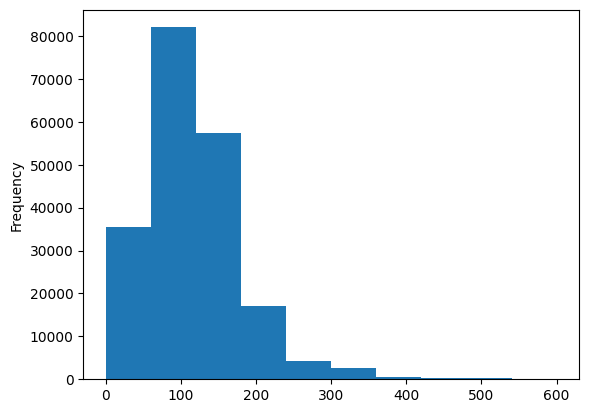

In [ ]:
data['power'].plot.hist()

In [ ]:
data['power'] = np.log1p(data['power'])  # 等价于 np.log(data['power'] + 1)
data['power'] = (data['power'] - data['power'].min()) / (data['power'].max() - data['power'].min())

<Axes: ylabel='Frequency'>

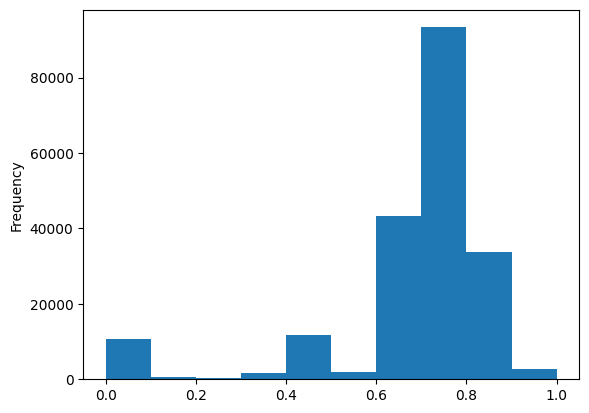

In [ ]:
data['power'].plot.hist()

### 3.4.2 对所有数值特征做归一化

In [ ]:
def min_max_normalize(df, cols):
    """
    对指定列进行min-max归一化处理（归一到[0,1]之间）
    :param df: pandas.DataFrame, 原始数据
    :param cols: list[str], 要归一化的列名列表
    :return: 归一化后的DataFrame（原地修改）
    """
    for col in cols:
        min_val = df[col].min()
        max_val = df[col].max()
        df[col] = (df[col] - min_val) / (max_val - min_val)
    return df

In [ ]:
num_cols = ['kilometer', "used_time_meanfill",'brand_amount','brand_price_average','brand_price_max','brand_price_median','brand_price_min', 'brand_price_std', 'brand_price_sum']
data = min_max_normalize(data, num_cols)

In [ ]:
data.head()

,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,...,used_time,used_time_meanfill,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average,power_bin
0,0,736,30.0,6.0,1,0,0,0.642465,0.684211,0,...,4385.0,0.475550,0.323856,0.587030,0.031860,0.005788,0.210398,0.179469,0.073866,1
1,1,2262,40.0,1.0,2,0,0,0.000000,0.842105,-1,...,4757.0,0.515884,0.440481,0.998980,0.189387,0.000000,0.748766,0.391788,0.238992,0
2,2,14874,115.0,15.0,1,0,0,0.797029,0.684211,0,...,4382.0,0.475225,0.046444,0.433578,0.274346,0.094849,0.084094,0.222787,0.255350,4
3,3,71865,109.0,10.0,0,0,1,0.823284,0.842105,0,...,7125.0,0.772634,0.454794,0.979413,0.150448,0.013083,0.702942,0.373868,0.214743,4
4,4,111080,110.0,5.0,1,0,0,0.661724,0.315789,0,...,1531.0,0.166106,0.148017,0.294545,0.051329,0.032081,0.088624,0.123027,0.065839,1


In [ ]:
data.columns

Index(['SaleID', 'name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage', 'price', 'v_0', 'v_1', 'v_2',
       'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'log_price', 'train', 'used_time', 'used_time_meanfill',
       'brand_amount', 'brand_price_max', 'brand_price_median',
       'brand_price_min', 'brand_price_sum', 'brand_price_std',
       'brand_price_average', 'power_bin'],
      dtype='object')

In [ ]:
data.shape

(200000, 38)

## 3.5 对类别特征做one-hot编码

In [ ]:
data['brand'].nunique()

40

In [ ]:
data['model'].nunique()

248

In [ ]:
data_for_lr = pd.get_dummies(data, columns=["model", "brand", "bodyType", "fuelType", 'gearbox', 'notRepairedDamage', 'power_bin'])

In [ ]:
print(data_for_lr.shape)
data_for_lr.columns

(200000, 349)


Index(['SaleID', 'name', 'power', 'kilometer', 'price', 'v_0', 'v_1', 'v_2',
       'v_3', 'v_4',
       ...
       'notRepairedDamage_-1', 'notRepairedDamage_0', 'notRepairedDamage_1',
       'power_bin_0', 'power_bin_1', 'power_bin_2', 'power_bin_3',
       'power_bin_4', 'power_bin_5', 'power_bin_6'],
      dtype='object', length=349)

In [ ]:
data_for_lr.head()

,SaleID,name,power,kilometer,price,v_0,v_1,v_2,v_3,v_4,...,notRepairedDamage_-1,notRepairedDamage_0,notRepairedDamage_1,power_bin_0,power_bin_1,power_bin_2,power_bin_3,power_bin_4,power_bin_5,power_bin_6
0,0,736,0.642465,0.684211,1850.0,43.357796,3.966344,0.050257,2.159744,1.143786,...,False,True,False,False,True,False,False,False,False,False
1,1,2262,0.000000,0.842105,3600.0,45.305273,5.236112,0.137925,1.380657,-1.422165,...,True,False,False,True,False,False,False,False,False,False
2,2,14874,0.797029,0.684211,6222.0,45.978359,4.823792,1.319524,-0.998467,-0.996911,...,False,True,False,False,False,False,False,True,False,False
3,3,71865,0.823284,0.842105,2400.0,45.687478,4.492574,-0.050616,0.883600,-2.228079,...,False,True,False,False,False,False,False,True,False,False
4,4,111080,0.661724,0.315789,5200.0,44.383511,2.031433,0.572169,-1.571239,2.246088,...,False,True,False,False,True,False,False,False,False,False


In [ ]:
# LR使用的数据集
data_for_lr.to_csv('/content/drive/My Drive/推荐系统项目-二手车价格预测/data_for_lr.csv', index=False)

In [ ]:
data.head()

,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,...,used_time,used_time_meanfill,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average,power_bin
0,0,736,30.0,6.0,1,0,0,0.642465,0.684211,0,...,4385.0,0.475550,0.323856,0.587030,0.031860,0.005788,0.210398,0.179469,0.073866,1
1,1,2262,40.0,1.0,2,0,0,0.000000,0.842105,-1,...,4757.0,0.515884,0.440481,0.998980,0.189387,0.000000,0.748766,0.391788,0.238992,0
2,2,14874,115.0,15.0,1,0,0,0.797029,0.684211,0,...,4382.0,0.475225,0.046444,0.433578,0.274346,0.094849,0.084094,0.222787,0.255350,4
3,3,71865,109.0,10.0,0,0,1,0.823284,0.842105,0,...,7125.0,0.772634,0.454794,0.979413,0.150448,0.013083,0.702942,0.373868,0.214743,4
4,4,111080,110.0,5.0,1,0,0,0.661724,0.315789,0,...,1531.0,0.166106,0.148017,0.294545,0.051329,0.032081,0.088624,0.123027,0.065839,1


In [ ]:
# DNN使用的数据集
# 不需要对类别特征做one-hot编码,而是在DNN中做Embedding
data.to_csv(r'/content/drive/My Drive/推荐系统项目-二手车价格预测/data_for_DNN.csv', index=False)

# 4. 模型建立

## 4.1 线性回归

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [4]:
data_for_lr = pd.read_csv(r'/content/drive/My Drive/推荐系统项目-二手车价格预测/data_for_lr.csv')

In [5]:
data_for_lr.head()

,SaleID,name,power,kilometer,price,v_0,v_1,v_2,v_3,v_4,...,notRepairedDamage_-1,notRepairedDamage_0,notRepairedDamage_1,power_bin_0,power_bin_1,power_bin_2,power_bin_3,power_bin_4,power_bin_5,power_bin_6
0,0,736,0.642465,0.684211,1850.0,43.357796,3.966344,0.050257,2.159744,1.143786,...,False,True,False,False,True,False,False,False,False,False
1,1,2262,0.000000,0.842105,3600.0,45.305273,5.236112,0.137925,1.380657,-1.422165,...,True,False,False,True,False,False,False,False,False,False
2,2,14874,0.797029,0.684211,6222.0,45.978359,4.823792,1.319524,-0.998467,-0.996911,...,False,True,False,False,False,False,False,True,False,False
3,3,71865,0.823284,0.842105,2400.0,45.687478,4.492574,-0.050616,0.883600,-2.228079,...,False,True,False,False,False,False,False,True,False,False
4,4,111080,0.661724,0.315789,5200.0,44.383511,2.031433,0.572169,-1.571239,2.246088,...,False,True,False,False,True,False,False,False,False,False


In [6]:
data_for_lr.isnull().sum().sort_values(ascending=False)

,0
log_price,51563
price,50000
v_14,18760
v_13,4703
v_12,1921
...,...
model_82.0,0
model_81.0,0
model_80.0,0
model_79.0,0


In [7]:
# 拆分训练集和测试集
train_data = data_for_lr[data_for_lr['train'] == 1].drop(columns=['train', "used_time", "SaleID"])
test_data = data_for_lr[data_for_lr['train'] == 0].drop(columns=['train'])

In [8]:
train_data.isnull().sum().sort_values(ascending=False)

,0
v_14,14116
v_13,3583
log_price,1563
v_12,1469
model_206.0,0
...,...
model_83.0,0
model_82.0,0
model_81.0,0
model_80.0,0


In [9]:
train_data = train_data.dropna().reset_index(drop=True)

In [10]:
train_data.shape

(135884, 346)

In [11]:
test_data.columns

Index(['SaleID', 'name', 'power', 'kilometer', 'price', 'v_0', 'v_1', 'v_2',
       'v_3', 'v_4',
       ...
       'notRepairedDamage_-1', 'notRepairedDamage_0', 'notRepairedDamage_1',
       'power_bin_0', 'power_bin_1', 'power_bin_2', 'power_bin_3',
       'power_bin_4', 'power_bin_5', 'power_bin_6'],
      dtype='object', length=348)

In [ ]:
'log_price' in test_data.columns

True

In [ ]:
test_data['log_price'].isna().all()

np.True_

In [ ]:
test_data['price'].isna().all()

np.True_

In [12]:
test_data = test_data.drop(columns=['price', "log_price"])

### 4.1.1 划分数据集

In [13]:
X = train_data.drop(columns=['price', "log_price"])
y = train_data['price']

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=327)

In [15]:
X_train.shape, X_valid.shape

((108707, 344), (27177, 344))

### 4.1.2 模型训练 - Linear regression - Baseline

In [32]:
model = LinearRegression()
model = model.fit(X_train, y_train)

In [33]:
mean_absolute_error(y_valid, model.predict(X_valid))

2155.2963818643775

### 4.1.3 模型训练 - Lasso(L1正则化)

In [34]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

In [35]:
# 使用 GridSearchCV 调参，使用 5 折交叉验证
grid_search = GridSearchCV(Lasso(), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.391e+11, tolerance: 5.016e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.269e+11, tolerance: 4.949e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.249e+11, tolerance: 4.948e

KeyboardInterrupt: 

In [ ]:
# 最佳模型
best_model = grid_search.best_estimator_

# 验证集预测与评估
y_pred = best_model.predict(X_valid)
mae = mean_absolute_error(y_valid, y_pred)

print("Best alpha:", grid_search.best_params_['alpha'])
print("Validation MAE:", mae)

Best alpha: 0.0001
Validation MAE: 0.1941245154393898


### 4.1.4 模型训练 - Ridge(L2正则化)

In [ ]:
param_grid_ridge = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

In [ ]:
# 使用 GridSearchCV 对 Ridge 回归调参
grid_search = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.00723e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.01173e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.01378e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.01533e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_absolute_error')

In [ ]:
# 最佳模型
best_model = grid_search.best_estimator_

# 验证集预测与评估
y_pred = best_model.predict(X_valid)
mae = mean_absolute_error(y_valid, y_pred)

print("Best alpha:", grid_search.best_params_['alpha'])
print("Validation MAE:", mae)

Best alpha: 0.001
Validation MAE: 0.18832008699674088


## 4.2 XGBRegressor

In [3]:
from xgboost.sklearn import XGBRegressor  #引入xgboost回归树模型

In [4]:
data_for_tree = pd.read_csv(r'/content/drive/My Drive/推荐系统项目-二手车价格预测/data_for_tree.csv')

In [5]:
data_for_tree.head()

,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,...,used_time,used_time_meanfill,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average,power_bin
0,0,736,30.0,6.0,1,0,0,60.0,12,0,...,4385.0,4385.0,10076.0,59900.0,1650.0,0.216981,3.468970e+07,4656.121118,3442.46,1.0
1,1,2262,40.0,1.0,2,0,0,0.0,15,-1,...,4757.0,4757.0,13702.0,99900.0,6100.0,0.011300,1.234055e+08,9450.843699,9005.73,0.0
2,2,14874,115.0,15.0,1,0,0,163.0,12,0,...,4382.0,4382.0,1451.0,45000.0,8500.0,3.381581,1.387650e+07,5634.345867,9556.82,4.0
3,3,71865,109.0,10.0,0,0,1,193.0,15,0,...,7125.0,7125.0,14147.0,98000.0,5000.0,0.476178,1.158543e+08,9046.159956,8188.74,4.0
4,4,111080,110.0,5.0,1,0,0,68.0,5,0,...,1531.0,1531.0,4609.0,31500.0,2200.0,1.151239,1.462294e+07,3381.498842,3172.01,1.0


In [6]:
data_for_tree.isnull().sum().sort_values(ascending=False)

,0
log_price,51563
price,50000
v_14,18760
v_13,4703
power_bin,3335
v_12,1921
fuelType,0
bodyType,0
brand,0
model,0


In [7]:
# 拆分训练集和测试集
train_data1 = data_for_tree[data_for_tree['train'] == 1].drop(columns=['train', "used_time", "SaleID"])
test_data1 = data_for_tree[data_for_tree['train'] == 0].drop(columns=['train'])

In [8]:
train_data1.isnull().sum().sort_values(ascending=False)

,0
v_14,14116
v_13,3583
power_bin,2555
log_price,1563
v_12,1469
name,0
model,0
brand,0
bodyType,0
gearbox,0


In [9]:
train_data1 = train_data1.dropna().reset_index(drop=True)

In [10]:
train_data1.shape

(135770, 35)

In [11]:
test_data1 = test_data1.drop(columns=['price', "log_price"])

### 4.2.1 划分数据集

In [12]:
X1 = train_data1.drop(columns=['price', "log_price"])
y1 = train_data1['price']

In [13]:
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1, y1, test_size=0.2, random_state=327)

In [14]:
X1_train.shape, X1_valid.shape

((108616, 33), (27154, 33))

In [15]:
y1_train.shape, y1_valid.shape

((108616,), (27154,))

### 4.2.2 模型训练 - XGBRegressor - Baseline

In [16]:
model_xgb = XGBRegressor(n_estimators = 100, objective='reg:squarederror')

In [17]:
model_xgb = model_xgb.fit(X1_train, y1_train)

In [18]:
mean_absolute_error(y1_valid, model_xgb.predict(X1_valid))

644.757535817996

### 4.2.3 GridSearch调参

In [19]:
model_xgb1 = XGBRegressor(n_estimators = 100, objective='reg:squarederror', device='cuda:0' )

In [20]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3,5,10,15,20],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}

In [24]:
grid_search = GridSearchCV(model_xgb1, param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X1_train, y1_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device='cuda:0',
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=No...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 10, 15, 20],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='neg_mean_absolute_error')

In [27]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1.0}


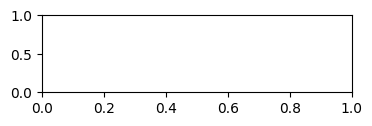

In [32]:
# 验证集预测与评估
y1_pred = best_model_xgb.predict(X1_valid)
y1_pred = np.clip(y1_pred, a_min=None, a_max=20)
y1_valid = np.clip(y1_valid, a_min=None, a_max=20)
# 反log变换，得到真实的price
y1_pred = np.expm1(y1_pred)
y1_valid = np.expm1(y1_valid)

In [33]:
mae = mean_absolute_error(y1_valid, y1_pred)
print("Best Parameters:", grid_search.best_params_)
print("Validation MAE:", mae)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1.0}
Validation MAE: 485159042.0618942


## 4.3 FM
+ 用的data_for_lr

In [16]:
!pip install xlearn
import xlearn as xl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 50.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for xlearn: filename=xlearn-0.40a1-py3-none-any.whl size=227153 sha256=51f19cb3b1c07b951bd61ba87cb312628ec3d16cd7480b5d610acdcbbbab4231
  Stored in directory: /root/.cache/pip/wheels/72/26/6e/2972274d133f591c34d9299ee113ee5c66bd1b2b1a79006789
Successfully built xlearn


In [17]:
# 保存为 xlearn 格式的 libsvm 文件
def save_libsvm(X, y, filename):
    with open(filename, 'w') as f:
        for i in range(X.shape[0]):
            line = str(y.iloc[i]) + ' '
            row = X.iloc[i]
            features = [f"{idx}:{val}" for idx, val in zip(range(len(row)), row) if val != 0]
            line += ' '.join(features) + '\n'
            f.write(line)

In [18]:
save_libsvm(X_train, y_train, "train.txt")
save_libsvm(X_valid, y_valid, "valid.txt")

### 4.3.1 Baseline model - FM

In [ ]:
# 训练 FM 模型
fm_model = xl.FMModel(task="reg", epoch=10, lr=0.2, reg_lambda=0.002, opt='sgd')
fm_model.fit("train.txt", eval_set="valid.txt", is_lock_free=True)

In [ ]:
# 预测
fm_model.predict("valid.txt", out_path="fm_out.txt")

In [ ]:
# 计算mae
y_pred = np.loadtxt("fm_out.txt")
mae = mean_absolute_error(y_valid, y_pred)
print(f"Validation MAE: {mae:.4f}")

### 4.3.2 Grid Search 调参



## 4.4 DeeFM

## 4.5 Wide&Deep